In [1]:
import fastf1 as ff1
from fastf1 import plotting

import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm

import numpy as np

In [2]:
ff1.Cache.enable_cache('Cache/')

pd.options.mode.chained_assignment=None

In [3]:
race=ff1.get_session(2021, 'France', 'R')

race.load()

laps = race.laps

core           INFO 	Loading data for French Grand Prix - Race [v2.2.9]
api            INFO 	Updating cache for driver_info...
api            INFO 	Fetching driver list...
api            INFO 	Cache updated!
api            INFO 	Updating cache for timing_data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Cache updated!
api            INFO 	Updating cache for timing_app_data...
api            INFO 	Fetching timing app data...
api            INFO 	Cache updated!
core           INFO 	Processing timing data...
api            INFO 	Updating cache for session_status_data...
api            INFO 	Fetching session status data...
api            INFO 	Cache updated!
api            INFO 	Updating cache for track_status_data...
api            INFO 	Fetching track status data...
api            INFO 	Cache updated!
api            INFO 	Updating cache for car_data...
api            INFO 	Fetching car data...
api            INFO 	Parsin

In [4]:
laps['LapTimeSeconds']=laps['LapTime'].dt.total_seconds()

laps=laps.loc[(laps['PitOutTime'].isnull() & laps['PitInTime'].isnull())]

In [5]:
drivers=['VER','HAM','LEC']
visualized_teams=[]

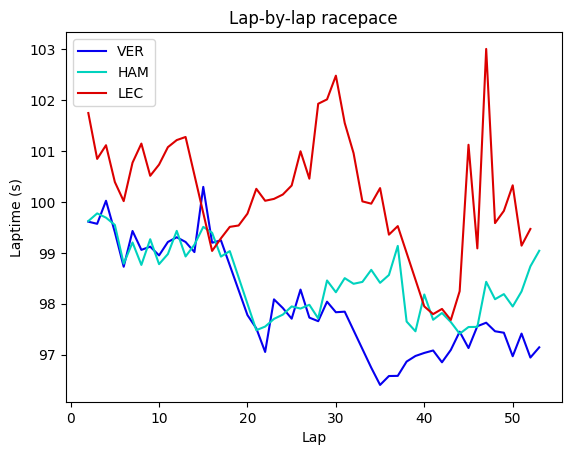

In [6]:
fig, ax = plt.subplots()
for driver in drivers:
    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    driver_laps = driver_laps.dropna()
    team = pd.unique(driver_laps['Team'])[0]
    x = driver_laps['LapNumber']
    poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
    y_poly = driver_laps['LapTimeSeconds']
    linestyle = '-' if team not in visualized_teams else ':'
    ax.plot(x, y_poly, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle)
    ax.set(ylabel = 'Laptime (s)')
    ax.set(xlabel = 'Lap')
    ax.set_title('Lap-by-lap racepace')
    ax.legend()
    visualized_teams.append(team)